<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/loan_default_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="6">Classification with Python</font></h1>

In this notebook we try to classify bank customers into possible loan-defaulters or non-defaulters using a bunch of classifier algorithms.<br>
We shall use The following algorithms:-<br>
K-Nearest-Neighbour(KNN) Classifier<br>
Logistic Regression Classifier<br>
Support Vector Machine Classifier<br>
Decision Trees Classifier<br>

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
#@title Default title text
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's now import libraries to evaluate the models we would build soon

In [0]:
from sklearn.metrics import f1_score, confusion_matrix, log_loss, roc_auc_score, accuracy_score, classification_report

The data set we shall use is from Credit One Bank and it's in Kaggle and can be  seen along side its data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan)<br>
Please open the link above to the data dictionary so that we know exactly what each coded categorical data stands for.

The raw file can be read straight from github via this [link](https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true')

In [0]:
data = 'https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true'

Reading the raw file to a data frame and setting row 2 as the header, since I first viewed the file in excel.<br>

Let's define additional NaN values that pandas may not see

In [0]:
additional_nan_values = ['n/a', '--','?','None','Non','non','none']

In [5]:
loan_df = pd.read_excel(data, header=2, na_values=additional_nan_values)

loan_df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


Let's check the shape

In [6]:
loan_df.shape

(5000, 23)

Shape is 5000 rows and 23 columns. <br>Pay attention to the data, it has  a lot of alpha-numeric notations<br>The best bet is to open the data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan) to a browser so one can understand what each notation stands for.

>>

Let's check the info and dtypes

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer_ID                  5000 non-null   int64 
 1   Status_Checking_Acc          5000 non-null   object
 2   Duration_in_Months           5000 non-null   int64 
 3   Credit_History               5000 non-null   object
 4   Purposre_Credit_Taken        5000 non-null   object
 5   Credit_Amount                5000 non-null   int64 
 6   Savings_Acc                  5000 non-null   object
 7   Years_At_Present_Employment  5000 non-null   object
 8   Inst_Rt_Income               5000 non-null   int64 
 9   Marital_Status_Gender        5000 non-null   object
 10  Other_Debtors_Guarantors     5000 non-null   object
 11  Current_Address_Yrs          5000 non-null   int64 
 12  Property                     5000 non-null   object
 13  Age                          5000

Let's check the stats for columns of object dtype and transpose it for readability

In [8]:
loan_df.describe(include=['object','category']).T

,count,unique,top,freq
Status_Checking_Acc,5000,4,A14,1970
Credit_History,5000,5,A32,2650
Purposre_Credit_Taken,5000,10,A43,1400
Savings_Acc,5000,5,A61,3015
Years_At_Present_Employment,5000,5,A73,1695
Marital_Status_Gender,5000,4,A93,2740
Other_Debtors_Guarantors,5000,3,A101,4535
Property,5000,4,A123,1660
Other_Inst_Plans,5000,3,A143,4070
Housing,5000,3,A152,3565


Now Let's check the stats for numeric  columns  and transpose it for readability

In [9]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5000.0,102500.500,1443.520003,100001.0,101250.75,102500.5,103750.25,105000.0
Duration_in_Months,5000.0,20.903,12.053989,4.0,12.00,18.0,24.00,72.0
Credit_Amount,5000.0,3271.258,2821.607329,250.0,1365.50,2319.5,3972.25,18424.0
Inst_Rt_Income,5000.0,2.973,1.118267,1.0,2.00,3.0,4.00,4.0
Current_Address_Yrs,5000.0,2.845,1.103276,1.0,2.00,3.0,4.00,4.0
Age,5000.0,35.546,11.370917,19.0,27.00,33.0,42.00,75.0
Num_CC,5000.0,1.407,0.577423,1.0,1.00,1.0,2.00,4.0
Dependents,5000.0,1.155,0.361941,1.0,1.00,1.0,1.00,2.0
Default_On_Payment,5000.0,0.299,0.457866,0.0,0.00,0.0,1.00,1.0
Count,5000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0


No missing values atall  as both numeric and object dtype columns have complete 5000 records, but let's just confirm.<br>

I also notice the count column seems to have only 1's in it and no reason why, let's consult the Data Dictionary to find out what it means  and deal with it as we pre-process the Data 

In [10]:
loan_df.isna().any().all()  # checking if any missing values and checking if any true value in the response

False

For a data set of 5000 rows and 23 columns, we may need to reduce it's memory consumption as we know pandas stores all floats as float64 and all int as int64 let's reduce some columns to int8 or int16, especially columns with single or double digit entries like Age

In [11]:
loan_df.dtypes

Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
Count                           int64
dtype: object

In [12]:
current_memory = loan_df.memory_usage().sum()
print('Current memory is-', current_memory,'Bytes.')

loan_df.memory_usage()

Current memory is- 920128 Bytes.


Index                            128
Customer_ID                    40000
Status_Checking_Acc            40000
Duration_in_Months             40000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  40000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                 40000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs            40000
Property                       40000
Age                            40000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                         40000
Job                            40000
Dependents                     40000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment             40000
Count                          40000
dtype: int64

In [13]:
# let's change all these columns with a max of 2 digits to int8 to save memory

loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']] = \
loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']].astype('int8')

# Let's change Credit_Amount to 1nt16 and Customer_ID to int32 to save memory

loan_df['Customer_ID'] = loan_df['Customer_ID'].astype('int32')
loan_df['Credit_Amount'] = loan_df['Credit_Amount'].astype('int16')
new_memory = loan_df.memory_usage().sum()
print('New memory is-', new_memory,'Bytes.')

loan_df.memory_usage()

New memory is- 590128 Bytes.


Index                            128
Customer_ID                    20000
Status_Checking_Acc            40000
Duration_in_Months              5000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  10000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                  5000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs             5000
Property                       40000
Age                             5000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                          5000
Job                            40000
Dependents                      5000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment              5000
Count                           5000
dtype: int64

Let's see how much memory we have saved

In [14]:
current_memory - new_memory  # We've saved 330,000 Bytes just now.

330000

Next we need to organise the Data into a more logical sequence before we start any computation.<br>
This means we arrange columns of similar meta-data together starting with categorical, then continuous columns.<br>
Except in case where it is more sensible to put a continuous variable before a categorical one.

In [15]:
# Let's see the total columns in the data set

loan_df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

I can see we need to clean some of the column names for empty spaces or misspelt words. Let's do so now.

In [0]:
loan_df.rename(columns={'Purposre_Credit_Taken':'Credit_Purpose', 
                        'Other_Inst_Plans ':'Other_Inst_Plans',
                        'Years_At_Present_Employment': 'Present_Employment_Years',
                        'Inst_Rt_Income':'Inst_Rate_Income',
                        'Num_CC':'Num_Curr_Credits'}, inplace=True)

Next, let's try to group them into subgroups using python lists. 
<br>
For exanmple we can have a list for bio-data, one for financial date and so on

In [0]:
customer_data = ['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing','Telephone', 'Property','Current_Address_Yrs']

job_and_personal_finance = ['Job', 'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc','Status_Checking_Acc', 'Credit_History']

loan_credit_data = ['Credit_Amount', 'Credit_Purpose', 'Duration_in_Months','Inst_Rate_Income','Other_Debtors_Guarantors','Other_Inst_Plans','Num_Curr_Credits','Default_On_Payment', "Count"]

The above process is highly manual and subject to errors let's confirm we made no errors before assigning the order

In [0]:
# lets concatenate the lists

new_columns = customer_data + job_and_personal_finance + loan_credit_data

Next let's strip off white-spaces either at the beginning or end of all column names, incase we mistakenly left it during the manual process

In [19]:
stripped_columns = [str.strip(x, ' ') for x in new_columns if x[0] or x[-1] == ' '] 
stripped_columns[:5]

['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing']

Now let's confirm that all column names in our stripped_column is not different from the default loan_df columns

In [20]:
set(loan_df.columns).difference(set(stripped_columns))

set()

The empty set above indicates no difference. Now we can go ahead and assign the new ordered and stripped off columns to loan_df

In [21]:
loan_df = loan_df[stripped_columns]

# let's see the first few rows
loan_df.head()

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,Present_Employment_Years,Savings_Acc,Status_Checking_Acc,Credit_History,Credit_Amount,Credit_Purpose,Duration_in_Months,Inst_Rate_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_Curr_Credits,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,A75,A65,A11,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,A73,A61,A12,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,A74,A61,A14,A34,2096,A46,12,2,A101,A143,1,0,1
3,100004,A93,45,2,A153,A191,A122,4,A173,A201,A74,A61,A11,A32,7882,A42,42,2,A103,A143,1,0,1
4,100005,A93,53,2,A153,A191,A124,4,A173,A201,A73,A61,A11,A33,4870,A40,24,3,A101,A143,2,1,1


This is beautiful our loan_df columns are ordered in a logical fashion, let's start feature binarization and pre-processing

### First Let's **visualize** The relationships between the categorical variables and Default on payments column (our target variable)

In [22]:
categorical_cols = loan_df.select_dtypes(['object']).columns
print(categorical_cols)

Index(['Marital_Status_Gender', 'Housing', 'Telephone', 'Property', 'Job',
       'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc',
       'Status_Checking_Acc', 'Credit_History', 'Credit_Purpose',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans'],
      dtype='object')


In the same vein, let's also identify the numerical columns

In [23]:
numerical_columns = loan_df.select_dtypes(['number']).columns
print(numerical_columns)

Index(['Customer_ID', 'Age', 'Dependents', 'Current_Address_Yrs',
       'Credit_Amount', 'Duration_in_Months', 'Inst_Rate_Income',
       'Num_Curr_Credits', 'Default_On_Payment', 'Count'],
      dtype='object')


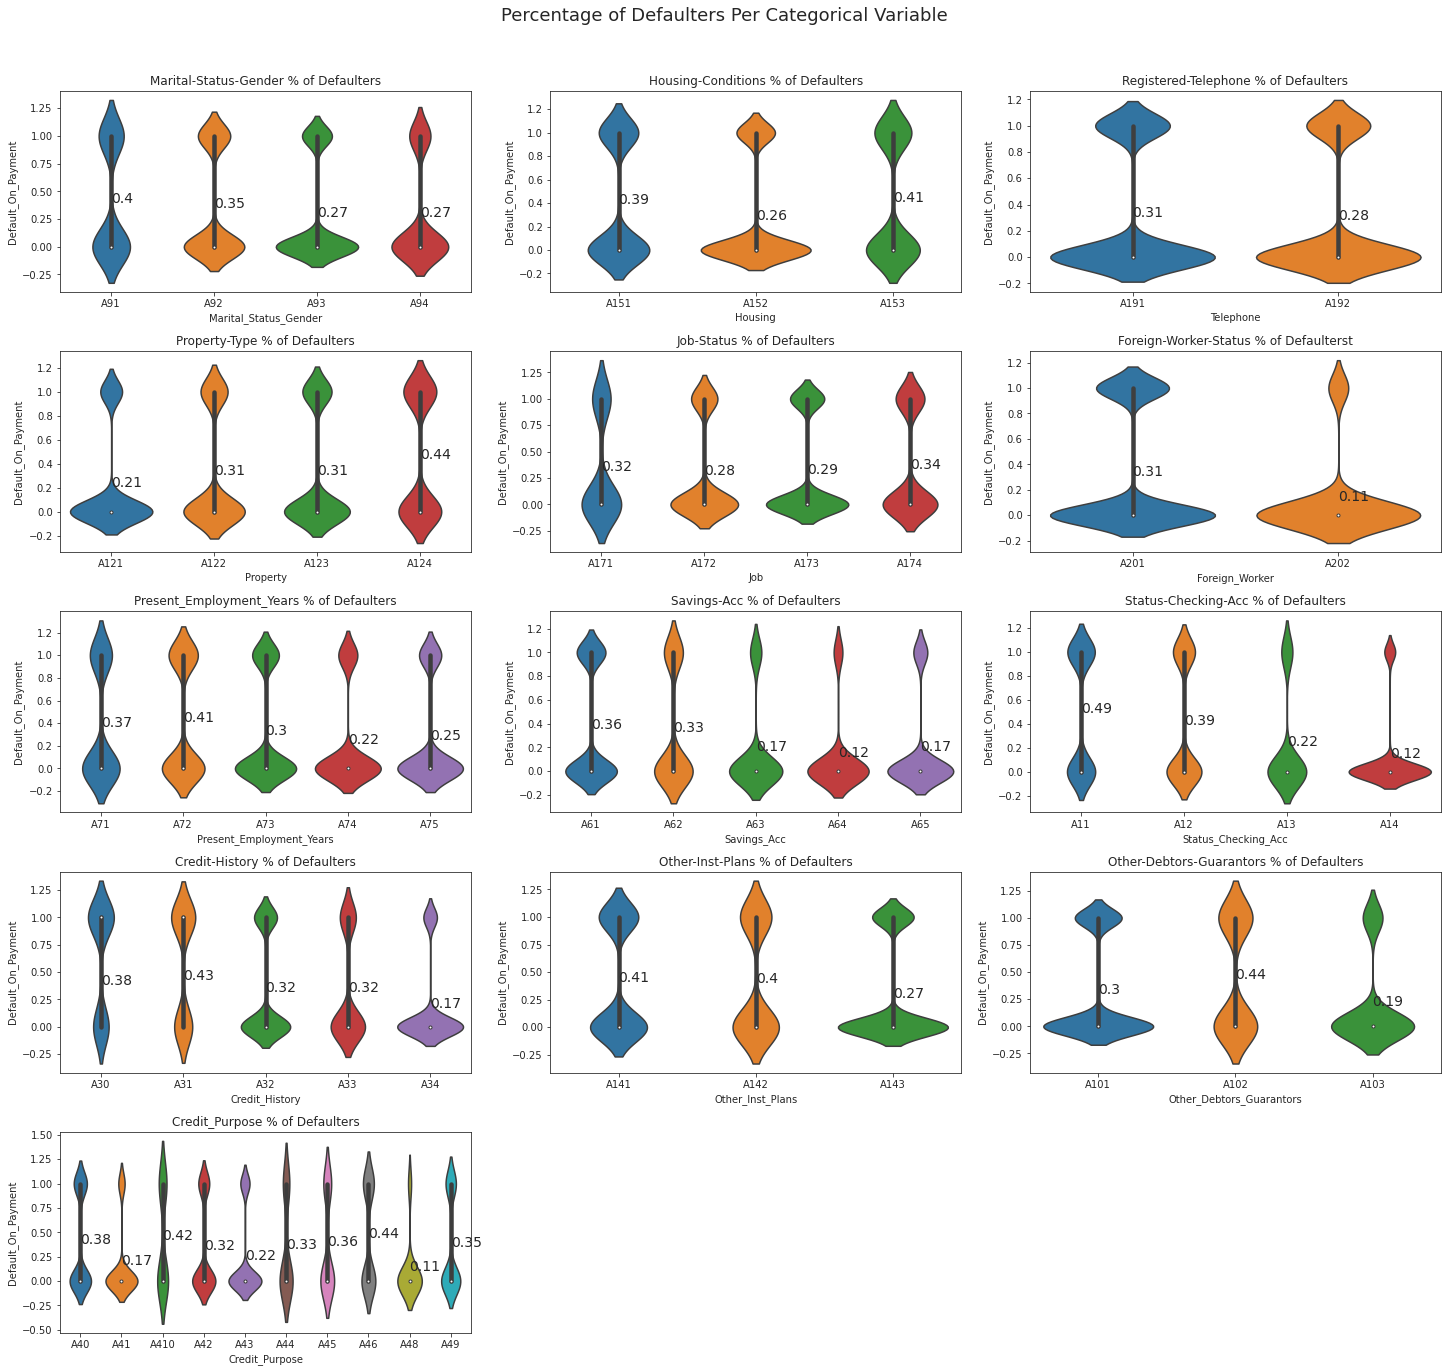

In [24]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(20,18))
sns.set_style('ticks')

specs = gridspec.GridSpec(ncols=3, nrows=5, figure=fig)
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[0, 2])
ax4 = fig.add_subplot(specs[1, 0])
ax5 = fig.add_subplot(specs[1, 1])
ax6 = fig.add_subplot(specs[1, 2])
ax7 = fig.add_subplot(specs[2, 0])
ax8 = fig.add_subplot(specs[2, 1])
ax9 = fig.add_subplot(specs[2, 2])
ax10 = fig.add_subplot(specs[3, 0])
ax11 = fig.add_subplot(specs[3, 1])
ax12 = fig.add_subplot(specs[3, 2])
ax13 = fig.add_subplot(specs[4, 0])
# ax14 = fig.add_subplot(specs[4, 1])
# ax15 = fig.add_subplot(specs[4, 2])

plt.suptitle('Percentage of Defaulters Per Categorical Variable', fontsize=18, y=1.05)


ax1 = sns.violinplot('Marital_Status_Gender', 'Default_On_Payment', data=loan_df, order=['A91','A92','A93','A94'], ax=ax1)
ax1.set_title('Marital-Status-Gender % of Defaulters')
yposlist = loan_df.groupby(['Marital_Status_Gender'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax1.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax2 = sns.violinplot('Housing', 'Default_On_Payment', data=loan_df, order=['A151','A152','A153'], ax=ax2)
ax2.set_title('Housing-Conditions % of Defaulters')
yposlist = loan_df.groupby(['Housing'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax2.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax3 = sns.violinplot('Telephone', 'Default_On_Payment', data=loan_df,order=['A191','A192'], ax=ax3)
ax3.set_title('Registered-Telephone % of Defaulters')
yposlist = loan_df.groupby(['Telephone'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax3.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax4 = sns.violinplot('Property', 'Default_On_Payment', data=loan_df,order=['A121','A122','A123','A124'], ax=ax4)
ax4.set_title('Property-Type % of Defaulters')
yposlist = loan_df.groupby(['Property'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax4.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax5 = sns.violinplot('Job', 'Default_On_Payment', data=loan_df, order=['A171','A172','A173','A174'], ax=ax5)
ax5.set_title('Job-Status % of Defaulters')
yposlist = loan_df.groupby(['Job'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax5.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax6 = sns.violinplot('Foreign_Worker', 'Default_On_Payment', data=loan_df, ax=ax6)
ax6.set_title('Foreign-Worker-Status % of Defaulterst')
yposlist = loan_df.groupby(['Foreign_Worker'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax6.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax7 = sns.violinplot('Present_Employment_Years', 'Default_On_Payment', order=['A71','A72','A73','A74','A75'], data=loan_df, ax=ax7)
ax7.set_title('Present_Employment_Years % of Defaulters')
yposlist = loan_df.groupby(['Present_Employment_Years'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax7.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax8 = sns.violinplot('Savings_Acc', 'Default_On_Payment', data=loan_df, order=['A61','A62','A63','A64','A65'], ax=ax8)
ax8.set_title('Savings-Acc % of Defaulters')
yposlist = loan_df.groupby(['Savings_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax8.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax9 = sns.violinplot('Status_Checking_Acc', 'Default_On_Payment', data=loan_df,order=['A11','A12','A13','A14'], ax=ax9)
ax9.set_title('Status-Checking-Acc % of Defaulters')
yposlist = loan_df.groupby(['Status_Checking_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax9.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax10 = sns.violinplot('Credit_History', 'Default_On_Payment', data=loan_df, order=['A30','A31','A32','A33','A34'], ax=ax10)
ax10.set_title('Credit-History % of Defaulters')
yposlist = loan_df.groupby(['Credit_History'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax10.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax11 = sns.violinplot('Other_Inst_Plans', 'Default_On_Payment', data=loan_df,order=['A141','A142','A143'], ax=ax11)
ax11.set_title('Other-Inst-Plans % of Defaulters')
yposlist = loan_df.groupby(['Other_Inst_Plans'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax11.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax12 = sns.violinplot('Other_Debtors_Guarantors', 'Default_On_Payment', data=loan_df, order=['A101','A102','A103'], ax=ax12)
ax12.set_title('Other-Debtors-Guarantors % of Defaulters')
yposlist = loan_df.groupby(['Other_Debtors_Guarantors'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax12.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

ax13 = sns.violinplot('Credit_Purpose', 'Default_On_Payment', data=loan_df, order=['A40','A41','A410','A42','A43','A44','A45','A46','A48','A49'], ax=ax13)
ax13.set_title('Credit_Purpose % of Defaulters')
yposlist = loan_df.groupby(['Credit_Purpose'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    plt.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

plt.show()

The essence of visualizing the defaulting percentage of each categorical variable and sub variables is to identify the variables that may be useful for training our model.<br>These variables should not have around 50% chance of defaulting, this shows a weak relationship. Ideally we want variables that have less than 40% or more than 60% chance of defaulting to train our model.<br>

My threshold is <br>

###$defaulting <= 0.4\: or\: >= 0.6$<br>

Thus, I will select only those categorical variables that indicate a defaulting score equal to or larger than 60% or less than or equal to 40%.<br>


### Feature Binarization

In [25]:
loan_df.head(3)

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,Present_Employment_Years,Savings_Acc,Status_Checking_Acc,Credit_History,Credit_Amount,Credit_Purpose,Duration_in_Months,Inst_Rate_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_Curr_Credits,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,A75,A65,A11,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,A73,A61,A12,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,A74,A61,A14,A34,2096,A46,12,2,A101,A143,1,0,1


Let's binarize categorical variables below and save it in a new variable loan_df_dummies

In [26]:
loan_df_dummies = pd.get_dummies(loan_df)
loan_df_dummies.head(10)

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Count,Marital_Status_Gender_A91,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Property_A124,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A72,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A410,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A46,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A141,Other_Inst_Plans_A142,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,100002,22,1,2,5951,48,2,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,100003,49,2,3,2096,12,2,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,100004,45,2,4,7882,42,2,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,100005,53,2,4,4870,24,3,2,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,100006,35,2,4,9055,36,2,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
6,100007,53,1,4,2835,24,3,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
7,100008,35,1,2,6948,36,2,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,100009,61,1,4,3059,12,2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,100010,28,1,2,5234,30,4,2,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


Let's see howmany total columns we have in loan_df_dummies

In [27]:
loan_df_dummies.shape  # we now have 64 total columns from 23 of before

(5000, 64)

Now let's select categorical columns whose elements are not  upto 40%  defaulters or above 60% as we visualized earlier

In [28]:
categorical_cols = loan_df.select_dtypes(['object']).columns
print(categorical_cols)

Index(['Marital_Status_Gender', 'Housing', 'Telephone', 'Property', 'Job',
       'Foreign_Worker', 'Present_Employment_Years', 'Savings_Acc',
       'Status_Checking_Acc', 'Credit_History', 'Credit_Purpose',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans'],
      dtype='object')


Next let's loop through each categorical column and create a list of columns to be deleted whose elements show a relatively weak relationship with default-on-payment target variable.

In [29]:
# Let's define a simple method that we can use to sort out the features to delete

def delete_categorical_feature(categorical_cols):
    """ This method takes a list of categorical columns,and returns a list 
    of feature attributes to delete based on set threshold """
    
    delete_list = []
    for x in categorical_cols:
        default_df = loan_df.groupby(x)['Default_On_Payment'].value_counts(normalize=True).to_frame()[1::2]
        delete_feature = default_df[(default_df.Default_On_Payment >= 0.4) & (default_df.Default_On_Payment <= 0.6)]
        delete = [delete_feature.index[i][0] for i in range(len(delete_feature))]
        for i in range(len(delete)):
            delete[i] = x + '_' + delete[i]
        delete_list += delete
    return delete_list

delete_list = delete_categorical_feature(categorical_cols)
print('Total cols to be deleted-', len(delete_list))
delete_list

Total cols to be deleted- 11


['Marital_Status_Gender_A91',
 'Housing_A153',
 'Property_A124',
 'Present_Employment_Years_A72',
 'Status_Checking_Acc_A11',
 'Credit_History_A31',
 'Credit_Purpose_A410',
 'Credit_Purpose_A46',
 'Other_Debtors_Guarantors_A102',
 'Other_Inst_Plans_A141',
 'Other_Inst_Plans_A142']

Now let's delete the weak relationship cols

In [0]:
loan_df_dummies = loan_df_dummies.drop(delete_list, axis=1)

In [31]:
loan_df_dummies.shape

(5000, 53)

In [32]:
loan_df_dummies.head(10)

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Count,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1,100002,22,1,2,5951,48,2,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,100003,49,2,3,2096,12,2,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,100004,45,2,4,7882,42,2,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
4,100005,53,2,4,4870,24,3,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
5,100006,35,2,4,9055,36,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6,100007,53,1,4,2835,24,3,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
7,100008,35,1,2,6948,36,2,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
8,100009,61,1,4,3059,12,2,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
9,100010,28,1,2,5234,30,4,2,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1


Let's inspect the numerical columns

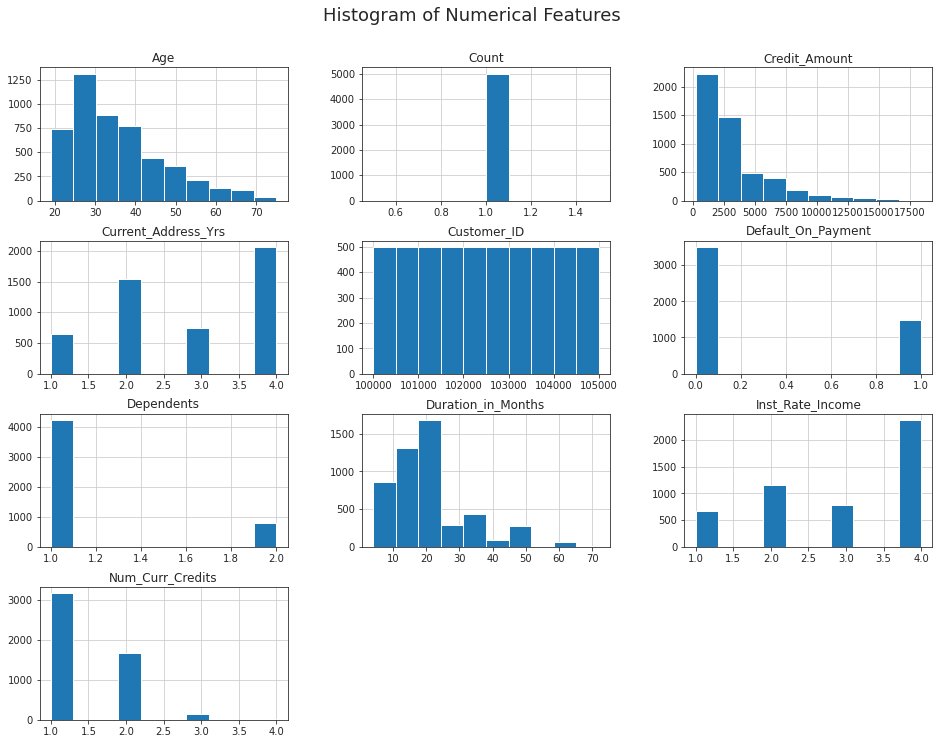

In [33]:
loan_df[numerical_columns].hist(figsize=(16,12))
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

I do not think the count and CustomerID columns are any useful, but let's look at the correlation of the numerical columns

In [34]:
loan_df.Age.median() > loan_df.Age.mean() 

False

In [35]:
loan_df.Age.median()

33.0

In [36]:
loan_df.Age.mean() 

35.546

Let's see the correlation of variables in our data set

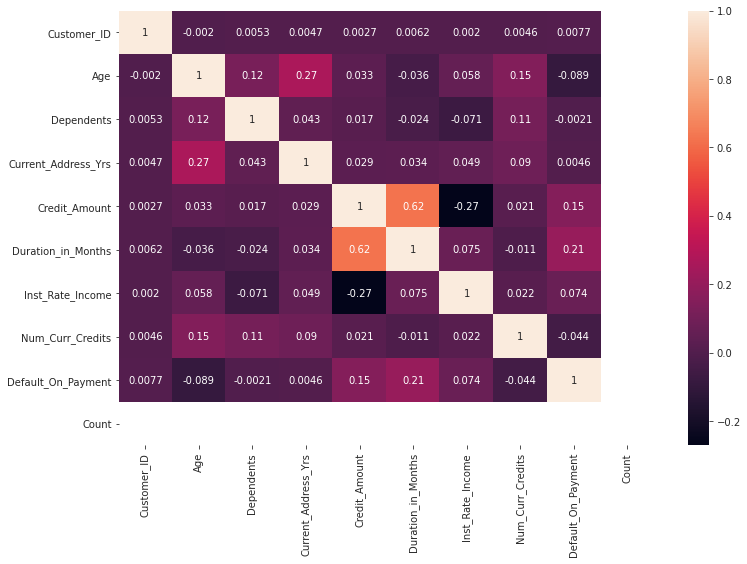

In [37]:
corr_data = loan_df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

Okay so back to the count column, I have checked the Data Dictionary and frankly do not see any mention of it, lemme investigate further

In [38]:
loan_df_dummies.Count.nunique()

# this shows it contains only one unique item which is 1,  5000 times.
# I don't see any use for it and will delete it in the dummies data frame so it is not one of our features

1

Let's drop the Count column as well as the customer Id column

In [39]:
loan_df_dummies.drop(['Count', 'Customer_ID'], axis=1, inplace=True)

# let's confirm that the delete is done.
'Count' in loan_df_dummies.columns

False

In [40]:
loan_df_dummies.head(10)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Default_On_Payment,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,67,1,4,1169,6,4,2,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1,22,1,2,5951,48,2,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,49,2,3,2096,12,2,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,45,2,4,7882,42,2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
4,53,2,4,4870,24,3,2,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
5,35,2,4,9055,36,2,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
6,53,1,4,2835,24,3,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
7,35,1,2,6948,36,2,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
8,61,1,4,3059,12,2,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
9,28,1,2,5234,30,4,2,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1


Then finally for this phase, let's reposition our target variable to the last column

In [41]:
temp = loan_df_dummies.Default_On_Payment

loan_df_dummies = loan_df_dummies.drop('Default_On_Payment', axis=1)

loan_df_dummies['Default_On_Payment'] = temp

loan_df_dummies.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1


### How Balanced is our data?

Let's check the ratio of defaulters to non-defaulters in the data set. 

In [42]:
loan_df.Default_On_Payment.value_counts(normalize=True)

0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

70% of the data set customers do not default and only 30% do.<br>
So we have an imbalanced data set.

An imbalanced Data set is one in which the elements within it are not evenly or fairly arranged.<br>
Just as in this case, we have 70% of elements in Non-default-class and 30% in Default-class.

let's visualize that

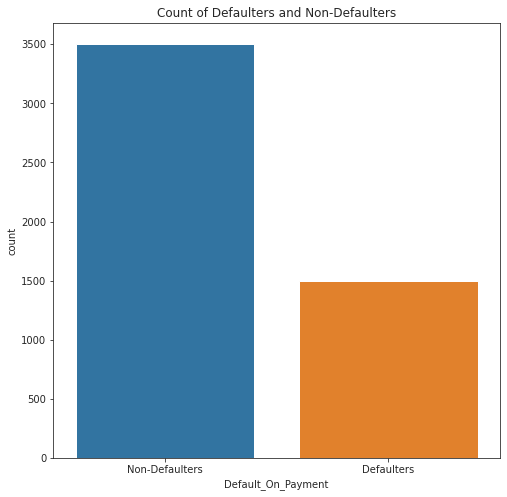

In [43]:
plt.figure(figsize=(8, 8))

x = loan_df_dummies.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters')
plt.show()

### Now Let's balance The Data set by Over-Sampling

We need to balance The Data set because in an imbalanced Data set Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results (that is, when the numbers of observations in different classes vary greatly).<br>
For example, 70% non-defaulters and 30% defaulters, a particular classifier might classify all or most of the observations as Non-defaulters.<br> 
This is due to the classifier or model having a high recognition rate (sensitivity) for the dominant class.<br>
[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) too, would even be more unreliable in an imbalanced Data set.
See [link](https://en.wikipedia.org/wiki/Confusion_matrix)

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [45]:
over_sampled_features, over_sampled_target = sm.fit_resample(loan_df_dummies.drop('Default_On_Payment', axis=1), loan_df_dummies.Default_On_Payment)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [46]:
print('Shape of resampled feature set is:',over_sampled_features.shape)
print('Shape of resampled target data is:',over_sampled_target.shape)

Shape of resampled feature set is: (7010, 50)
Shape of resampled target data is: (7010,)


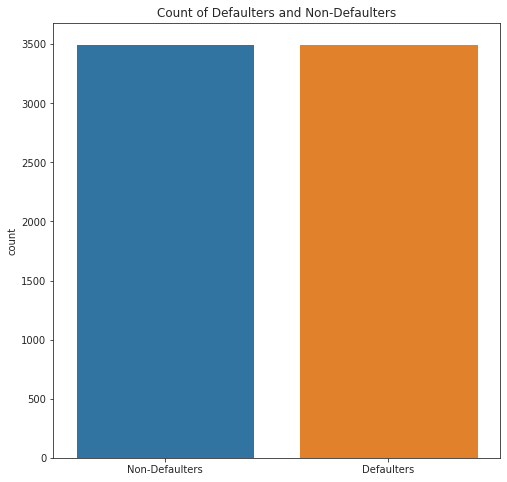

In [47]:
plt.figure(figsize=(8, 8))

yy = pd.Series(over_sampled_target).replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(yy)
plt.title('Count of Defaulters and Non-Defaulters')
plt.show()

In [48]:
# The SMOTE process returns a numpy array, from the features and target dataframe it received.
type(over_sampled_features)

numpy.ndarray

Let's concat the features and target back into one data frame

In [49]:
over_sampled_features = pd.DataFrame(over_sampled_features)

over_sampled_features['x'] = over_sampled_target

resampled_data = over_sampled_features

resampled_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,x
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0


And let's input the column headers

In [50]:
resampled_data.columns = loan_df_dummies.columns

resampled_data.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1


Let's revisualize the resampled target column that shows the number of Defaulters and Non-defaulters

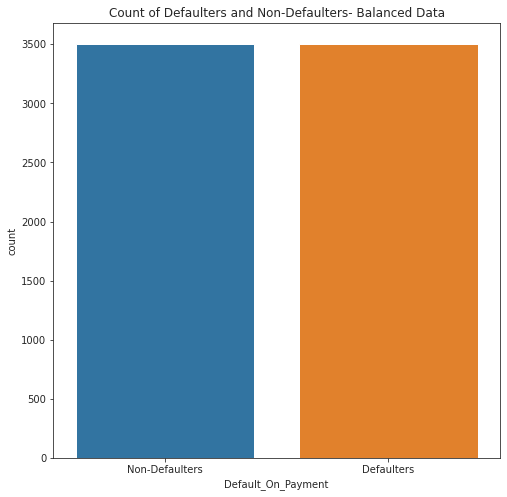

In [51]:
plt.figure(figsize=(8, 8))

x = resampled_data.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters- Balanced Data')
plt.show()

## **Feature Normalization**

Let's use the min-max Normalizer by simply subtracting the min from each entry and divide by the range. This will return a number between 0 and 1 for all features

In [52]:
resampled_data.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [0]:
resampled_data.iloc[:,:-1] = resampled_data.iloc[:,:-1].apply(lambda x: (x - min(x)) / (max(x) - min(x)))

Let's see the normalized features

In [54]:
resampled_data.head(5)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.464286,1.0,1.000000,0.419941,0.558824,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.607143,1.0,1.000000,0.254209,0.294118,0.666667,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


## Splitting The Data set into Training, Validation and Testing sets


We shall use 70% for training,  15% for validation and 15% reserved only for final testing 

**Let's define the Training sets**

In [0]:
from sklearn.model_selection import train_test_split
X = resampled_data.iloc[:,:-1]
Y = resampled_data.Default_On_Payment

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y)

**Now let's define the Testing and validation sets by splitting from the test_set**

In [0]:
# let's further split y_train, y_test into test and validation sets
X = x_test
Y = y_test

x_val, x_test, y_val, y_test = train_test_split(X, Y, test_size = 0.5, stratify=Y)

In [57]:
print('x_train shape is:', x_train.shape)
print('y_train shape is:', y_train.shape)
print('x_val shape is:', x_val.shape)
print('y_val shape is:', y_val.shape)
print('x_test shape is:', x_test.shape)
print('y_test shape is:', y_test.shape)

x_train shape is: (4907, 50)
y_train shape is: (4907,)
x_val shape is: (1051, 50)
y_val shape is: (1051,)
x_test shape is: (1052, 50)
y_test shape is: (1052,)


### Let's define a function for plotting and visualizing The Confusion matrix

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###  K-Nearest-Neighbour Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
def knn_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and testing data sets and creates a 
    knn classifier, then it tunes the hyper-parameters of the classifier to
    find the best model parameters and returns the best knn classifier model
    """
    #List Hyperparameters that we want to tune.
    leaf_size = list(range(1,6))
    #leaf_size = list(range(1,31))
    #n_neighbors = list(range(1,31))
    n_neighbors = list(range(1,6))
    p=[1,2]
    #Convert to dictionary
    hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

    # create a new KNN object
    knn = KNeighborsClassifier()

    #Use GridSearch
    knn_grid = GridSearchCV(knn, hyperparameters, cv=3)
    
    #Fit the model 
    best_model = knn_grid.fit(x_train, y_train)

    #Print The value of best Hyperparameters
    print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
    print('Best p:', best_model.best_estimator_.get_params()['p'])
    print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

    evaluation_dict ={'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    y_hat = best_model.predict(x_val)
    evaluation_dict['AUC'] = roc_auc_score(y_val, y_hat)

    # Let's Measure the F1 Score
    evaluation_dict['F1_Score'] = round(f1_score(y_val, y_hat, average='weighted'),4)
        
    # Let's Measure Logloss
    evaluation_dict['Logloss'] = round(log_loss(y_val, y_hat, normalize=True),4)

    print(evaluation_dict)
    
    # Compute confusion matrix
    knn_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(knn_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for KNN-Classifier')


    return best_model
                

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
{'AUC': 1.0, 'F1_Score': 1.0, 'Log_Loss': 0, 'Logloss': 0.0}
Confusion matrix, without normalization
[[525   0]
 [  0 526]]


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

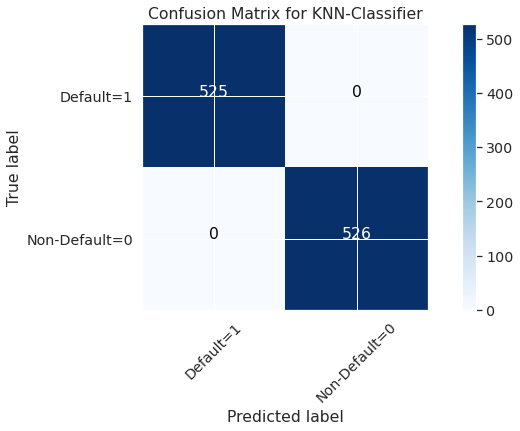

In [61]:
KNN_Model = knn_classifier(x_train, y_train, x_val, y_val)
KNN_Model

### Logistic Regression Classifier

In [0]:
# Let's import the Logistic Regression Classifier and a few additional libraries.

from sklearn.linear_model import LogisticRegression
import pylab as pl
import scipy.optimize as opt


In [0]:
def log_reg_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and validation datasets and returns
    The best possible Logistic Regression Model"""

    evaluation_dict ={'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    # Let's define some hyper parameters to tune our Log_Reg Model.
    dual=[True,False]
    max_iter=[160, 170, 180,190,200]
    #C = [1.0,1.5,2.0,2.5]
    C = [0.001, 0.01, 0.1, 1, 10]
    param_grid = dict(dual=dual,max_iter=max_iter,C=C)

    # Initiate the LR model with random hyperparameters
    lr = LogisticRegression(penalty='l2')
    grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

    grid_result = grid.fit(x_train, y_train)
    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    y_hat = grid_result.predict(x_val)
    evaluation_dict['AUC'] = roc_auc_score(y_val, y_hat)

    # Let's Measure the F1 Score
    evaluation_dict['F1_Score'] = round(f1_score(y_val, y_hat, average='weighted'),4)
        
    # Let's Measure Logloss
    evaluation_dict['logloss'] = round(log_loss(y_val, y_hat, normalize=True),4)

    print(evaluation_dict)
    
    # Compute confusion matrix
    logReg_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(logReg_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for LogReg-Classifier')

    
    return grid_result

Best: 0.769715 using {'C': 0.1, 'dual': False, 'max_iter': 160}
{'AUC': 0.7716675719717545, 'F1_Score': 0.7715, 'Log_Loss': 0, 'logloss': 7.8872}
Confusion matrix, without normalization
[[417 108]
 [132 394]]


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'dual': [True, False],
                         'max_iter': [160, 170, 180, 190, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

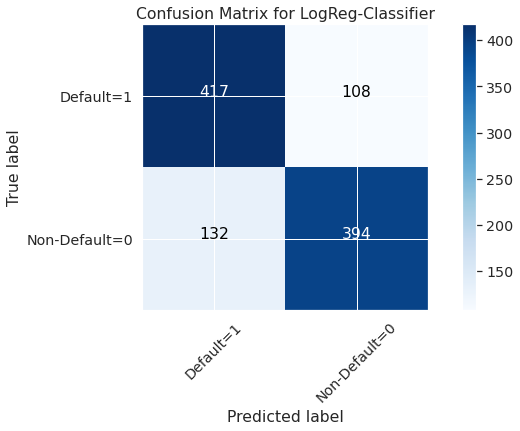

In [64]:
Log_Reg_Model = log_reg_classifier(x_train, y_train, x_val, y_val)
Log_Reg_Model

## Support Vector Machine (SVM)



In [0]:
from sklearn import svm

In [0]:
def svm_classifier(x_train, y_train, x_val, y_val):
    """This method takes the training and validation datasets as inputs,
    and iterates through the common SVM model kernels to return the best model
    we also apply some hyper-parameter tuning on the model"""

    # Let's define a list of kernels to try
    kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

    # Let's define a dict for evaluating each kernel performance
    evaluation_dict ={'Kernel':0, 'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    for i in kernel_list:
        # Let's define the model hyper-parameter tuning grid using GridSearch 
        Cs = [0.001, 0.01, 0.1, 1, 10]
        gammas = [0.001, 0.01, 0.1, 1]
        param_grid = {'C': Cs, 'gamma' : gammas}
        model = GridSearchCV(svm.SVC(kernel=i), param_grid, cv=3)
        # Let's train the model
        model.fit(x_train, y_train)
        # Let's get the best params of the model
        params = model.best_params_

        # Let's use the model to predict the x_val
        y_hat = model.predict(x_val)

        # Let's Measure the F1 Score
        val_f1 = round(f1_score(y_val, y_hat, average='weighted'),4)
        
        # Let's Measure Logloss
        logloss = round(log_loss(y_val, y_hat, normalize=True),4)

        # Let's compute the AUC score
        AUC = roc_auc_score(y_val, y_hat)
        
        if evaluation_dict['AUC'] < AUC:
            print(i)
            evaluation_dict['Kernel'] = i
            evaluation_dict['AUC'] = AUC
            evaluation_dict['F1_Score'] = val_f1
            evaluation_dict['Log_Loss'] = logloss
            svm_model2 = model
            y_hat2 = y_hat

        # If we score a perfect model, then break out of loop!
        if evaluation_dict['AUC'] == 1:
            break

    print(evaluation_dict)
    print('best_params: ',params)

    # Compute confusion matrix
    svm_cnf_matrix = confusion_matrix(y_val, y_hat2, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(svm_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for SVM-Classifier')

    return svm_model2

linear
poly
{'Kernel': 'poly', 'AUC': 1.0, 'F1_Score': 1.0, 'Log_Loss': 0.0}
best_params:  {'C': 0.1, 'gamma': 1}
Confusion matrix, without normalization
[[525   0]
 [  0 526]]


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

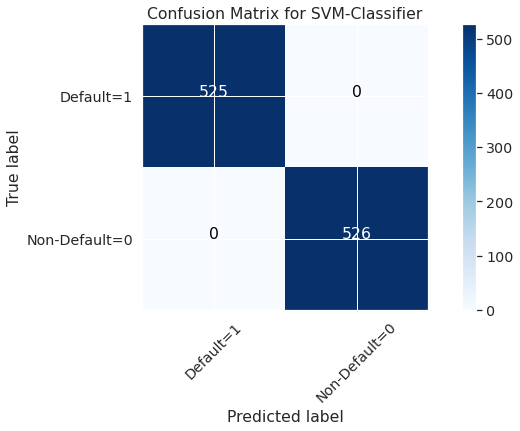

In [67]:
SVM_Model = svm_classifier(x_train, y_train, x_val, y_val)
SVM_Model

Note that hyper-parameter tuning is quite important as can be seen here.
<br>Because when we ran the model without tuning, we got an AUC of 0.9626, F1_Score of 0.962 and best Kernel as Poly.
<br>But with hyper-parameter tuning we can see a spike in AUC to 99.71 and F1_Score to 99.71 and best Kernel is RBF


## Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

Let's define a function that returns the best decison tree classifier model and outputs its parameters and  a plot of the confusion matrix

In [0]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters
max_depth = 100

def decision_tree_classifier(max_depth, x_train, y_train, x_val, y_val):
    """Method takes max_depth an int, and x_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best max_depth value, from 1 to max_depth, and its best test_accuracy score"""
    
    evaluation_dict ={'Max_Depth':0, 'AUC':0, 'F1_Score':0, 'Log_Loss':0}

    
    for i in range(1, max_depth+1):
        # Let's instantiate a model
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        
        # Let's train the model
        decision_model.fit(x_train, y_train)
        
        # Let's make prediction on the test data
        y_hat = decision_model.predict(x_val)
        
        # Let's Measure the F1 Score
        val_f1 = round(f1_score(y_val, y_hat, average='weighted'),4)
        
        # Let's Measure Logloss
        logloss = round(log_loss(y_val, y_hat, normalize=True),4)

        # Let's compute the AUC score
        AUC = roc_auc_score(y_val, y_hat)
        # print(AUC,':',i)
        
        if evaluation_dict['AUC'] < AUC:
            evaluation_dict['Max_Depth'] = i
            evaluation_dict['AUC'] = AUC
            evaluation_dict['F1_Score'] = val_f1
            evaluation_dict['Log_Loss'] = logloss
            decision_model2 = decision_model

        # If we score a perfect model, then break out of loop!
        if evaluation_dict['AUC'] == 1:
            break
            
    print('Model_Evaluation:')
    print(evaluation_dict)
    
    # Compute confusion matrix
    Dtrees_cnf_matrix = confusion_matrix(y_val, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for Decision-Tree-Classifier')

    return decision_model2

Model_Evaluation:
{'Max_Depth': 30, 'AUC': 0.9971464783632084, 'F1_Score': 0.9971, 'Log_Loss': 0.0986}
Confusion matrix, without normalization
[[522   3]
 [  2 524]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

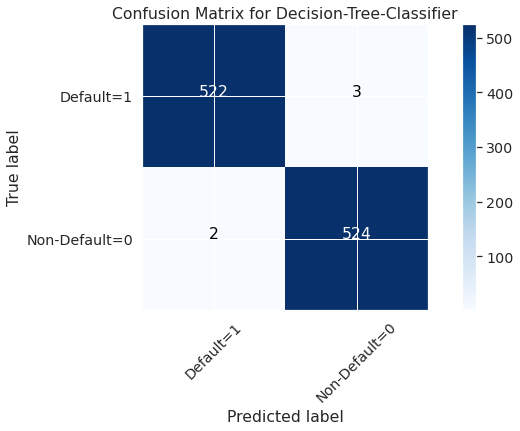

In [70]:
Decision_Tree_Model = decision_tree_classifier(max_depth, x_train, y_train, x_val, y_val)
Decision_Tree_Model

The area under the ROC curve or **AUC** is the measure of the trade-off between the True and False positive rates.

A perfect classifier would have an AUC of 1.0, indicating no trade-off between True and False positive rates. Thus the higher the ROC curve is to the top-left position (1, 1) the better the AUC score.

Notice the following about these metrics:<br>
• The Confusion Matrix shows the number of True Positives and True Negatives (cases
correctly classified) and False Negatives and False Positives (cases incorrectly classified).<br>
• The AUC (Area Under the Curve) is the area under the ROC (Receiver Operator Chart) curve. <br>
A perfect classifier would have an AUC of 1.0, indicating no trade-off between True and False Positive Rates.<br>
• Accuracy is the fraction of cases correctly classified.<br>
• Recall, is the fraction of positive cases correctly classified which is $(TP / (TP + FN))$.<br>
• Precision is the fraction of positive cases classified correctly from the total number of cases identified as positive. which is $(TP / (TP + FP))$

## Test Dataset:

Now that we've seen the performance of each model on the evaluation data set,<br>It's time to test these on the test data set

In [0]:
def best_model(x_test , y_test):
    """This method takes a test_evaluation_dict, as well as the test training
    set and test label and then returns a dataframe sorted with the model with
    the highest AUC score"""

    # Let's create a list of our models
    model_list = [KNN_Model, Log_Reg_Model, SVM_Model, Decision_Tree_Model]

    # Let's create a test evaluation dict and make the parameters its index
    test_evaluation_dict = {'KNN_Model':[0,0,0], 'Log_Reg_Model':[0,0,0], \
                            'SVM_Model':[0,0,0], 'Decision_Tree_Model':[0,0,0]}
    index_ = ['AUC_score', 'F1_score', 'Accuracy']  

    # Let's create a list of the keys of our dict above
    key_list = list(test_evaluation_dict.keys())

    for i in range(len(model_list)):
        model = model_list[i]
        key = key_list[i]

        # Let's create a list of test values
        eval_list = []

        # Let's make prediction on the test data
        y_hat = model.predict(x_test)

        # Let's add the AUC score
        eval_list.append(round(roc_auc_score(y_test, y_hat),4))
        
        # Let's add the F1 Score
        eval_list.append(round(f1_score(y_test, y_hat, average='weighted'),4))
        
        # Let's add accuracy
        eval_list.append(round(accuracy_score(y_test, y_hat),4))

        test_evaluation_dict[key] = eval_list       

    test_evaluation_df = pd.DataFrame(test_evaluation_dict, index=index_).T

    test_evaluation_df = test_evaluation_df\
    .sort_values(by=['AUC_score', 'F1_score'], ascending=False)

    test_evaluation_df.reset_index(inplace=True)
    test_evaluation_df.index = [1, 2, 3, 4]
    test_evaluation_df.columns = ['Model', 'AUC_score', 'F1_score', 'Accuracy']

    

    return test_evaluation_df


In [73]:
test_evaluation_dict = best_model(x_test , y_test)
test_evaluation_dict

,Model,AUC_score,F1_score,Accuracy
1,KNN_Model,1.0000,1.0000,1.0000
2,SVM_Model,1.0000,1.0000,1.0000
3,Decision_Tree_Model,0.9924,0.9924,0.9924
4,Log_Reg_Model,0.7795,0.7794,0.7795


## What Next?

We can see the best model on the never-before-seen testing set is Support Vector Machine (SVM).<br>
This is personally my preferred classifier model as SVMs are a solid classifier which usually perform excellently.<br>
SVMs are resistant to outliers, this means we get a clear boundary between the point data clouds, even if there are outliers in the data set.<br>
The optimisation objective of a Support Vector machine is Convex. That's a really cool feature because we're guaranteed that by optimising over the cost function of an SVM, we will always end up in the global minima.<br>
The only problem is that an SVM is a binary classifier.<br>
But, we can turn the SVM into a Multi-Class classifier Using the One-Versus-All approach.

It's important to also note the impressive performance of the KNN and Decision Tree classifier. These are also relatively good models. The issue with KNN is that it is not outlier resistant and it can only create spherical data point clouds on the data. This limitation makes it less powerful to SVMs generally.

**Disadvantages of KNN**

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

 While Decision Trees are relatively considered weak models, but in certain situations like this case, it has performed remarkably. 
 
 A small change in the data can cause a large change in the structure of the decision tree causing instability.
For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
Decision tree often involves higher time to train the model.
Decision tree training is relatively expensive as complexity and time taken is more.

 Logistic regression is ideal if the data points have a relatively linear relationship with the target label. They do not usually generalise well if the data set is curvy or scattered. 

### Before Deployment:

Finally before deploying the model, we need to train it with the entire data set, this iincludes the training, validation and testing data sets.

In [74]:
# Let's see the shape of the normalised and feature-engineered data set again
resampled_data.shape

(7010, 51)

In [75]:
# Let's see the first 5 rows
resampled_data.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.464286,1.0,1.000000,0.419941,0.558824,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.607143,1.0,1.000000,0.254209,0.294118,0.666667,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [76]:
# Let's define the feature set made up of all data points in the data set.
features = resampled_data.iloc[:,0:-1]
features.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rate_Income,Num_Curr_Credits,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Present_Employment_Years_A71,Present_Employment_Years_A73,Present_Employment_Years_A74,Present_Employment_Years_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Credit_Purpose_A40,Credit_Purpose_A41,Credit_Purpose_A42,Credit_Purpose_A43,Credit_Purpose_A44,Credit_Purpose_A45,Credit_Purpose_A48,Credit_Purpose_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,0.857143,0.0,1.000000,0.050567,0.029412,1.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.053571,0.0,0.333333,0.313690,0.647059,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.535714,1.0,0.666667,0.101574,0.117647,0.333333,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [77]:
# Now let's define the target or label
target = resampled_data.Default_On_Payment
target.head(3)

0    0
1    0
2    0
Name: Default_On_Payment, dtype: int8

Let's fit the features and target to the SVM Model. Meaning, let's train the model with the entire data set

In [78]:
SVM_Model = SVM_Model.fit(features, target)
SVM_Model

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Conclusion

We've just built a classifier model that can classify never-unseen data of bank customers into possible loan-defaulters or non-loan-defaulters.
<br>We have chosen the SVM classifier due to its numerous strengths mentioned above and it's impressive score of over 99% in AUC, F1 and Accuracy metrics. We have trained it with the entire 7010 data points and 51 dimensions.<br>Our model is ready to be deployed.
<br>Cheers!!